In [ ]:
# !pip install argparse pathlib torch tqdm numpy pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# go to project dir
%cd /content

# copy the code and data zip
!rsync -av /content/drive/MyDrive/c3_ldm_train ./c3_ldm_train_local

%cd /content/c3_ldm_train_local
!ls

/content
sending incremental file list
created directory ./c3_ldm_train_local
c3_ldm_train/
c3_ldm_train/.gitignore
c3_ldm_train/C3-LDM.md
c3_ldm_train/IMPLEMENTATION_ROADMAP.md
c3_ldm_train/README.md
c3_ldm_train/README_IMPLEMENTATION.md
c3_ldm_train/colab_training.ipynb
c3_ldm_train/create_pairing.py
c3_ldm_train/data.tar.gz
c3_ldm_train/inference.py
c3_ldm_train/train.py
c3_ldm_train/checkpoints/
c3_ldm_train/checkpoints/checkpoint_best.pt
c3_ldm_train/checkpoints/checkpoint_epoch0040_step00026200.pt
c3_ldm_train/checkpoints/checkpoint_epoch0045_step00029475.pt
c3_ldm_train/checkpoints/checkpoint_epoch0050_step00032750.pt
c3_ldm_train/checkpoints/checkpoint_latest.pt
c3_ldm_train/checkpoints/metadata_epoch0040_step00026200.json
c3_ldm_train/checkpoints/metadata_epoch0045_step00029475.json
c3_ldm_train/checkpoints/metadata_epoch0050_step00032750.json
c3_ldm_train/models/
c3_ldm_train/models/__init__.py
c3_ldm_train/models/baseline.py
c3_ldm_train/models/census_layer.py
c3_ldm_train/m

In [ ]:
# unzip data here in runtime memo
%cd /content/c3_ldm_train_local/c3_ldm_train/
!tar -xzf data.tar.gz
!ls data

/content/c3_ldm_train_local/c3_ldm_train
dataset.py  GHS_POP  HRSL  paired_dataset  tiles_2020


In [ ]:
# save checkpoints in drive, not runtime local (cause checkpoint loss when colab stop runtime on backend)
import os, pathlib

CKPT_DIR = "/content/drive/MyDrive/c3_ldm_train/checkpoints"    # modify this address
pathlib.Path(CKPT_DIR).mkdir(parents=True, exist_ok=True)
print("Checkpoint dir:", CKPT_DIR)

Checkpoint dir: /content/drive/MyDrive/c3_ldm_train/checkpoints


In [ ]:
# !python train.py \
#     --pairing_csv data/paired_dataset/multi_product_pairing.csv \
#     --batch_size 64 \
#     --num_epochs 50 \
#     --checkpoint_dir "$CKPT_DIR" \
#     --data_root data

Streaming output truncated to the last 5000 lines.
⚠️  WARNING: NaN/Inf detected in HRSL file: conus_002719.npy
  NaN count: 65291
  Inf count: 0
  Replacing with zeros...

⚠️  WARNING: NaN/Inf detected in HRSL file: conus_003236.npy
  NaN count: 65238
  Inf count: 0
  Replacing with zeros...

⚠️  WARNING: NaN/Inf detected in HRSL file: conus_000206.npy
  NaN count: 65472
  Inf count: 0
  Replacing with zeros...
Epoch 50:  69% 451/655 [03:13<01:27,  2.33it/s, L_diff=0.0005, L_kl=4.499972, L_recon=0.0791]
⚠️  WARNING: NaN/Inf detected in HRSL file: conus_002045.npy
  NaN count: 65311
  Inf count: 0
  Replacing with zeros...

⚠️  WARNING: NaN/Inf detected in HRSL file: conus_000292.npy
  NaN count: 65468
  Inf count: 0
  Replacing with zeros...
Epoch 50:  69% 452/655 [03:14<01:27,  2.33it/s, L_diff=0.0007, L_kl=4.500022, L_recon=0.1070]
⚠️  WARNING: NaN/Inf detected in HRSL file: conus_002679.npy
  NaN count: 65137
  Inf count: 0
  Replacing with zeros...

⚠️  WARNING: NaN/Inf detected i

In [ ]:
!python inference.py \
  --checkpoint checkpoints/checkpoint_best.pt \
  --condition data/tiles_2020/project/tiles_2020/features_012345.npy \
  --product_id 0 \
  --sampler ddim \
  --num_steps 50 \
  --output outputs/worldpop_012345.npy


C3-LDM Inference

Loading inputs...
  Condition shape: (2, 256, 256)
Loading models from: checkpoints/checkpoint_best.pt
  Loaded vae
  Loaded cond_encoder
  Loaded product_emb
  Loaded unet

Generating population maps...
  Product ID: 0
  Sampler: ddim
  Steps: 50
  Eta: 0.0
  Num samples: 1
DDIM Sampling (50 steps): 100% 50/50 [00:01<00:00, 46.90it/s]

Saving output to: outputs/worldpop_012345.npy
  Output shape: (1, 1, 256, 256)
  Population range: [0.00, 0.00]
  Total population: 0

✓ Inference completed!


In [ ]:
!python inference.py \
      --checkpoint checkpoints/checkpoint_best.pt \
      --condition data/tiles_2020/project/tiles_2020/features_002876.npy \
      --product_id 0 \
      --num_samples 1 \
      --sampler ddpm --num_steps 50 --eta 0.0 \
      --output outputs/pred_1_002876.npy


C3-LDM Inference

Loading inputs...
  Condition shape: (2, 256, 256)
Loading models from: checkpoints/checkpoint_best.pt
  Loaded vae
  Loaded cond_encoder
  Loaded product_emb
  Loaded unet

Generating population maps...
  Product ID: 0
  Sampler: ddpm
  Num samples: 3
DDPM Sampling: 100% 1000/1000 [00:14<00:00, 68.91it/s]

Saving output to: outputs/pred_1_002876.npy
  Output shape: (3, 1, 256, 256)
  Population range: [0.00, 0.00]
  Total population: 0

Sample statistics:
  Mean population: 0
  Std dev (spatial avg): 0.00

✓ Inference completed!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_tile(idx, product_id=0):
    products = ["WorldPop", "GHS-POP", "HRSL"]
    # 1. load condition and ground truth
    cond = np.load(f"data/tiles_2020/project/tiles_2020/features_{idx:06d}.npy")     # (2,256,256)
    # change gt load address for other products
    gt   = np.load(f"data/tiles_2020/project/tiles_2020/target_{idx:06d}.npy")       # (1,256,256)

    pred = np.load(f"outputs/pred_{product_id}_{idx:06d}.npy")[0,0]   # (256,256)

    viirs = cond[0]
    wsf   = cond[1]
    gt    = gt[0]

    vmin, vmax = np.percentile(gt, [1, 99])

    fig, axes = plt.subplots(1, 4, figsize=(16,4))
    axes[0].imshow(viirs, cmap="viridis")
    axes[0].set_title(f"VIIRS {idx}")
    axes[0].axis("off")

    axes[1].imshow(wsf, cmap="viridis")
    axes[1].set_title("WSF")
    axes[1].axis("off")

    gt_vmin, gt_vmax = np.percentile(gt, [1, 99])  # prevent extreme values
    im2 = axes[2].imshow(gt, cmap="viridis", vmin=gt_vmin, vmax=gt_vmax)
    axes[2].set_title("Ground Truth (WorldPop)")
    fig.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

    pred_vmin, pred_vmax = np.percentile(pred, [1, 99])
    im3 = axes[3].imshow(pred, cmap="viridis", vmin=pred_vmin, vmax=pred_vmax)
    axes[3].set_title(f"C3-LDM Prediction ({products[product_id]})")
    fig.colorbar(im3, ax=axes[3], fraction=0.046, pad=0.04)

    for ax in axes:
        ax.axis("off")

    plt.tight_layout()
    plt.show()


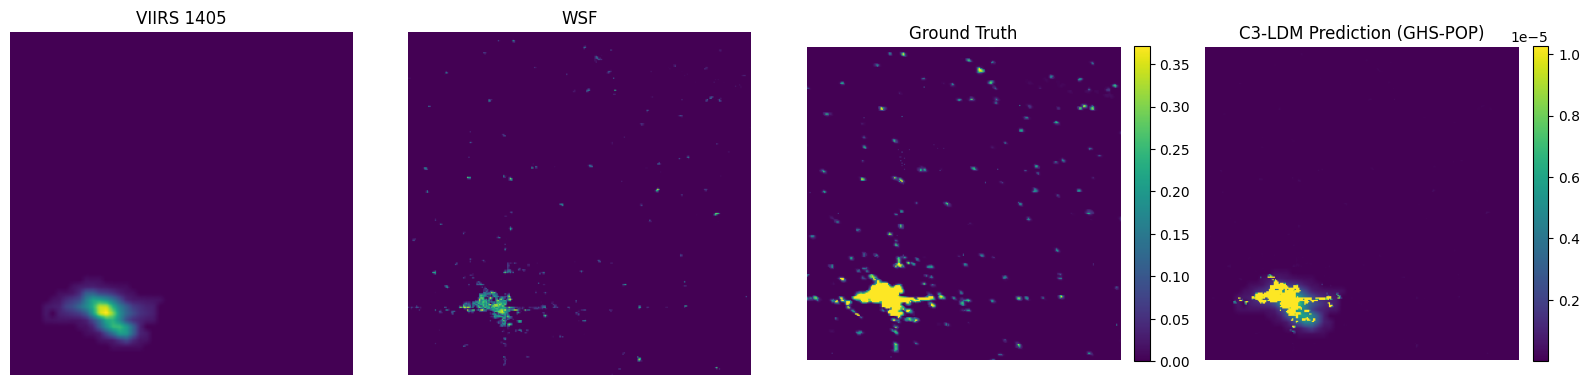

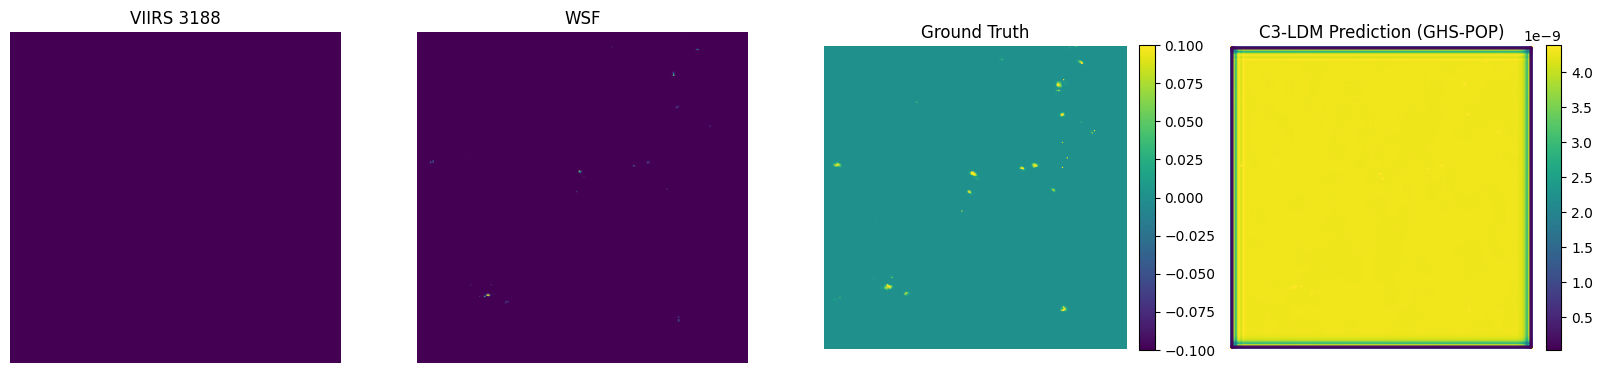

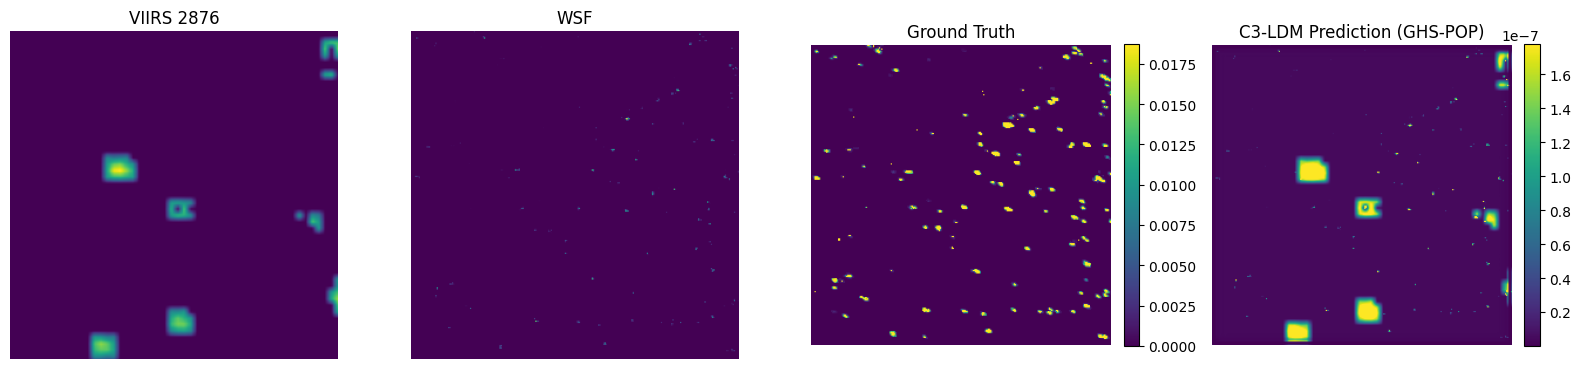

In [ ]:
for idx in [1405, 3188, 2876]:
    show_tile(idx, product_id=1)


In [ ]:
import numpy as np

paths = ["outputs/pred_0_003186.npy", "outputs/worldpop_012345.npy"]   # 换成实际路径
for path in paths:
    arr = np.load(path)

    print("shape:", arr.shape)
    print("min:", arr.min(), "max:", arr.max(), "mean:", arr.mean())
    print("nonzero count:", np.count_nonzero(arr))

shape: (1, 1, 256, 256)
min: 5.074242e-13 max: 0.00037204436 mean: 3.2664238e-07
nonzero count: 65536
shape: (1, 1, 256, 256)
min: 6.176515e-13 max: 0.00018679046 mean: 9.4720285e-08
nonzero count: 65536


shape: (1, 1, 256, 256)


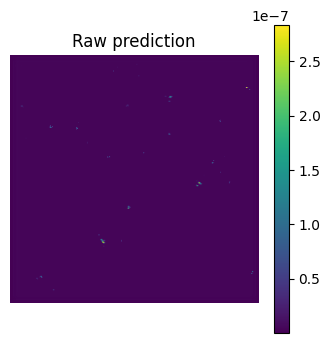

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

arr = np.load("outputs/pred_2_003185.npy")

print("shape:", arr.shape)

# 形状通常可能是 (num_samples, 1, 256, 256) 或 (1, 256, 256)
if arr.ndim == 4:
    img = arr[0, 0]
elif arr.ndim == 3:
    img = arr[0]
else:
    img = arr

plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="viridis")
plt.colorbar()
plt.title("Raw prediction")
plt.axis("off")
plt.show()
